In [1]:
# import modules & set up logging
import gensim, logging
from sortedcontainers import SortedDict
from gensim.models import KeyedVectors
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import unidecode
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
%matplotlib inline
import glob, os

In [2]:
from aligning_embeddings import *
from w2vtransformation import *
from relation import *

In [3]:
import zipfile
import datetime
import urllib.request
import os.path
import matplotlib.pyplot as plt
from umap import UMAP # actually called "umap-learn"
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [4]:
def calc_distance_between_vectors(vec1, vec2, distype = 'norm'):
    if distype is 'norm':
        return np.linalg.norm(np.subtract(vec1, vec2))
    else:
        return cossim(vec1, vec2)
    
def _calculateSymetricTransform(A, Ainv, B, Binv):
    '''Given two models (A and B) calculate the symetric version of the
    transformation matrix.'''
    Tab = calculateTransform(A, Ainv, B, Binv, sameVocab=False)
    Tba = calculateTransform(B, Binv, A, Ainv, sameVocab=False)
    TTinv = Tab * Tba
    return TTinv

def cossim(v1, v2, signed = True):
    c = np.dot(v1, v2)/np.linalg.norm(v1)/np.linalg.norm(v2)
    if not signed:
        return abs(c)
    return c

In [122]:
rel = Relation("data/question-words.txt")
cols = ['newspaper', 'years', 'period', 'infinitive', 'nationalities', 'diminutives',
       'country', 'pasttense', 'currency', 'gender', 'plural', 'opposites',
       'superlative', 'comparative', 'total']
df = pd.DataFrame(columns=cols)
for filename in glob.iglob('../ah_nrc/**', recursive=True):
    if os.path.isfile(filename): # filter dirs
        if "vocab" not in filename:
            pars = filename.split('/')
            model = KeyedVectors.load_word2vec_format(filename, binary=True)
            scores = rel.test_model(model)
            names = []
            accuracies = []
            for i in range(len(scores)):
                name = [v for k,v in scores[i].items() if k =='section']
                correct = sum(len(v)for k, v in scores[i].items() if k == 'correct')
                false = sum(len(v)for k, v in scores[i].items() if k == 'incorrect')
                try:
                    accuracy = correct / (correct + false)
                except:
                    accuracy = np.nan
                accuracies.append(accuracy)
            df = df.append({
                "newspaper": pars[1],
                "years": pars[2],
                "period": pars[3][:-4],
                "infinitive": accuracies[0],
                "nationalities": accuracies[1],
                "diminutives": accuracies[2],
                "country": accuracies[3],
                "pasttense": accuracies[4],
                "currency": accuracies[5],
                "gender": accuracies[6],
                "plural": accuracies[7],
                "opposites": accuracies[8],
                "superlative": accuracies[9],
                "comparative": accuracies[10],
                "total": accuracies[11]}, ignore_index=True)


2019-03-25 20:13:07,149 : INFO : loading projection weights from ../ah_nrc/10/1970_1979.w2v
2019-03-25 20:13:11,099 : INFO : loaded (129888, 300) matrix from ../ah_nrc/10/1970_1979.w2v
2019-03-25 20:13:11,236 : INFO : precomputing L2-norms of word weight vectors
2019-03-25 20:13:28,857 : INFO : infinitive: 35.7% (270/756)
2019-03-25 20:13:41,327 : INFO : nationalities: 14.5% (80/552)
2019-03-25 20:13:53,809 : INFO : diminutives: 13.4% (74/552)
2019-03-25 20:14:26,303 : INFO : country: 44.6% (594/1332)
2019-03-25 20:14:55,959 : INFO : pasttense: 43.1% (513/1190)
2019-03-25 20:15:01,199 : INFO : currency: 7.0% (19/272)
2019-03-25 20:15:10,625 : INFO : gender: 41.1% (190/462)
2019-03-25 20:15:35,586 : INFO : plural: 36.1% (405/1122)
2019-03-25 20:15:43,254 : INFO : opposites: 15.5% (53/342)
2019-03-25 20:15:55,075 : INFO : superlative: 13.0% (72/552)
2019-03-25 20:16:20,360 : INFO : comparative: 60.2% (716/1190)
2019-03-25 20:16:20,361 : INFO : total: 35.9% (2986/8322)


IndexError: list index out of range

In [5]:
analogies = pd.read_pickle('scores_all.pkl')

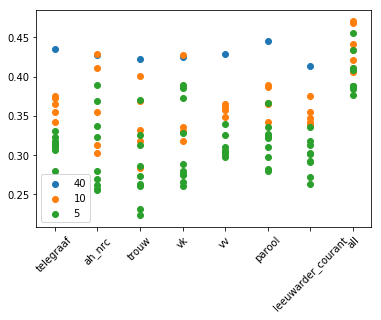

In [11]:
plt.scatter(analogies[analogies['years'] == '40']['newspaper'], analogies[analogies['years']=='40']['total'], label='40')
plt.scatter(analogies[analogies['years'] == '10']['newspaper'], analogies[analogies['years']=='10']['total'], label='10')
plt.scatter(analogies[analogies['years'] == '5']['newspaper'], analogies[analogies['years']=='5']['total'], label='5')
plt.xticks(rotation=45)
plt.legend()


In [283]:
models = []
for year in range(1950,1989, 10):
    models.append(KeyedVectors.load_word2vec_format('../embeddings/all/10/{}_{}.w2v'.format(year, year+9), binary=True))


    

2019-03-26 10:28:33,172 : INFO : loading projection weights from ../embeddings/all/10/1950_1959.w2v
2019-03-26 10:28:41,728 : INFO : loaded (219003, 300) matrix from ../embeddings/all/10/1950_1959.w2v
2019-03-26 10:28:41,729 : INFO : loading projection weights from ../embeddings/all/10/1960_1969.w2v
2019-03-26 10:28:48,450 : INFO : loaded (234082, 300) matrix from ../embeddings/all/10/1960_1969.w2v
2019-03-26 10:28:48,451 : INFO : loading projection weights from ../embeddings/all/10/1970_1979.w2v
2019-03-26 10:28:55,614 : INFO : loaded (246361, 300) matrix from ../embeddings/all/10/1970_1979.w2v
2019-03-26 10:28:55,615 : INFO : loading projection weights from ../embeddings/all/10/1980_1989.w2v
2019-03-26 10:29:02,989 : INFO : loaded (259324, 300) matrix from ../embeddings/all/10/1980_1989.w2v


In [124]:
models[0].init_sims(replace=True)
for i in range(1,4):
    models[i].init_sims(replace=True)
    models[i] = smart_procrustes_align_gensim(models[0], models[i])

2019-03-26 09:31:46,180 : INFO : precomputing L2-norms of word weight vectors
2019-03-26 09:31:46,532 : INFO : precomputing L2-norms of word weight vectors
2019-03-26 09:31:50,756 : INFO : precomputing L2-norms of word weight vectors
2019-03-26 09:31:54,816 : INFO : precomputing L2-norms of word weight vectors


In [127]:
models[1].most_similar('democratie', topn=50)

[('democratisch', 0.7067642211914062),
 ('dictatuur', 0.690366268157959),
 ('rechtsstaat', 0.6714876890182495),
 ('socialisme', 0.6524535417556763),
 ('staatsbestel', 0.648666501045227),
 ('monarchie', 0.6475238800048828),
 ('liberalisme', 0.6389231085777283),
 ('demo', 0.6338615417480469),
 ('persvrijheid', 0.6249649524688721),
 ('vrijheid', 0.6158601641654968),
 ('totalitaire', 0.6157306432723999),
 ('regeringsvorm', 0.6064642071723938),
 ('democratische', 0.6057966947555542),
 ('meningsuiting', 0.5969613194465637),
 ('ideologie', 0.5861529111862183),
 ('communisme', 0.5811423063278198),
 ('staatsvorm', 0.5771751403808594),
 ('onvrijheid', 0.5752301216125488),
 ('samenleving', 0.5736581683158875),
 ('gaullisme', 0.5706791877746582),
 ('partijpolitiek', 0.5695987939834595),
 ('politiestaat', 0.5665651559829712),
 ('volk', 0.5597866773605347),
 ('kapitalisme', 0.5516196489334106),
 ('anarchie', 0.5490706562995911),
 ('verdraagzaamheid', 0.5476925373077393),
 ('welvaartsstaat', 0.546857

In [128]:
top10k = models[0].wv.index2entity[:1000]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [41]:
keys = []
for k in models[0].vocab:
    keys.append(k)

In [129]:
from tqdm import tqdm
intersections = []
jaccards = []
def intersection(lst1, lst2): 
    return len([value for value in lst1 if value in lst2])

def jaccard(list1, list2):
    return float(len(set(list1) & set(list2))) / len(set(list1) | set(list2))

for k in tqdm(top100k):
    a = [k[0]for k in models[0].most_similar(k, topn=50)]
    b = [k[0]for k in models[3].most_similar(k, topn=50)]
    #intersections.append(intersection(a, b))
    jaccards.append(jaccard(a,b))
    




  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 4/10000 [00:00<05:21, 31.10it/s]


  0%|          | 7/10000 [00:00<05:32, 30.03it/s]


  0%|          | 10/10000 [00:00<05:42, 29.15it/s]


  0%|          | 13/10000 [00:00<05:44, 29.02it/s]


  0%|          | 16/10000 [00:00<05:45, 28.92it/s]


  0%|          | 19/10000 [00:00<05:46, 28.84it/s]


  0%|          | 22/10000 [00:00<05:51, 28.41it/s]


  0%|          | 25/10000 [00:00<05:48, 28.63it/s]


  0%|          | 28/10000 [00:00<05:52, 28.31it/s]


  0%|          | 31/10000 [00:01<05:53, 28.22it/s]


  0%|          | 34/10000 [00:01<05:53, 28.20it/s]


  0%|          | 37/10000 [00:01<05:56, 27.97it/s]


  0%|          | 40/10000 [00:01<06:02, 27.45it/s]


  0%|          | 43/10000 [00:01<05:56, 27.96it/s]


  0%|          | 46/10000 [00:01<05:58, 27.78it/s]


  0%|          | 49/10000 [00:01<05:55, 28.00it/s]


  1%|          | 52/10000 [00:01<05:55, 28.00it/s]


  1%|          | 55/10000 [00:01<05:53, 28.17it/s]


 

  5%|▍         | 482/10000 [00:15<05:03, 31.39it/s]


  5%|▍         | 486/10000 [00:15<05:03, 31.31it/s]


  5%|▍         | 490/10000 [00:16<05:06, 31.07it/s]


  5%|▍         | 494/10000 [00:16<05:05, 31.13it/s]


  5%|▍         | 498/10000 [00:16<05:05, 31.11it/s]


  5%|▌         | 502/10000 [00:16<05:04, 31.17it/s]


  5%|▌         | 506/10000 [00:16<05:06, 30.94it/s]


  5%|▌         | 510/10000 [00:16<05:07, 30.85it/s]


  5%|▌         | 514/10000 [00:16<05:04, 31.17it/s]


  5%|▌         | 518/10000 [00:16<05:05, 31.01it/s]


  5%|▌         | 522/10000 [00:17<05:02, 31.30it/s]


  5%|▌         | 526/10000 [00:17<05:05, 31.02it/s]


  5%|▌         | 530/10000 [00:17<05:05, 30.98it/s]


  5%|▌         | 534/10000 [00:17<05:03, 31.19it/s]


  5%|▌         | 538/10000 [00:17<05:01, 31.38it/s]


  5%|▌         | 542/10000 [00:17<05:02, 31.30it/s]


  5%|▌         | 546/10000 [00:17<05:01, 31.31it/s]


  6%|▌         | 550/10000 [00:17<05:01, 31.33it/s]


  6%|▌         | 554/10000 [

 10%|▉         | 995/10000 [00:32<04:58, 30.16it/s]


 10%|▉         | 999/10000 [00:32<04:53, 30.71it/s]


 10%|█         | 1003/10000 [00:32<04:52, 30.79it/s]


 10%|█         | 1007/10000 [00:32<04:48, 31.13it/s]


 10%|█         | 1011/10000 [00:32<04:50, 30.90it/s]


 10%|█         | 1015/10000 [00:32<04:51, 30.84it/s]


 10%|█         | 1019/10000 [00:33<04:49, 31.01it/s]


 10%|█         | 1023/10000 [00:33<04:49, 31.01it/s]


 10%|█         | 1027/10000 [00:33<04:49, 31.03it/s]


 10%|█         | 1031/10000 [00:33<04:49, 30.94it/s]


 10%|█         | 1035/10000 [00:33<04:45, 31.37it/s]


 10%|█         | 1039/10000 [00:33<04:48, 31.08it/s]


 10%|█         | 1043/10000 [00:33<04:49, 30.90it/s]


 10%|█         | 1047/10000 [00:33<04:50, 30.80it/s]


 11%|█         | 1051/10000 [00:34<04:58, 30.03it/s]


 11%|█         | 1055/10000 [00:34<05:02, 29.57it/s]


 11%|█         | 1059/10000 [00:34<04:56, 30.13it/s]


 11%|█         | 1063/10000 [00:34<04:54, 30.39it/s]


 11%|█      

 15%|█▌        | 1507/10000 [00:48<04:48, 29.41it/s]


 15%|█▌        | 1510/10000 [00:48<04:49, 29.33it/s]


 15%|█▌        | 1514/10000 [00:49<04:45, 29.73it/s]


 15%|█▌        | 1518/10000 [00:49<04:43, 29.90it/s]


 15%|█▌        | 1521/10000 [00:49<04:43, 29.88it/s]


 15%|█▌        | 1525/10000 [00:49<04:41, 30.14it/s]


 15%|█▌        | 1529/10000 [00:49<04:41, 30.14it/s]


 15%|█▌        | 1533/10000 [00:49<04:40, 30.18it/s]


 15%|█▌        | 1537/10000 [00:49<04:40, 30.14it/s]


 15%|█▌        | 1541/10000 [00:49<04:39, 30.32it/s]


 15%|█▌        | 1545/10000 [00:50<04:35, 30.68it/s]


 15%|█▌        | 1549/10000 [00:50<04:36, 30.59it/s]


 16%|█▌        | 1553/10000 [00:50<04:32, 31.00it/s]


 16%|█▌        | 1557/10000 [00:50<04:34, 30.73it/s]


 16%|█▌        | 1561/10000 [00:50<04:32, 30.99it/s]


 16%|█▌        | 1565/10000 [00:50<04:37, 30.36it/s]


 16%|█▌        | 1569/10000 [00:50<04:42, 29.84it/s]


 16%|█▌        | 1573/10000 [00:50<04:30, 31.11it/s]


 16%|█▌   

 20%|██        | 2015/10000 [01:05<04:24, 30.21it/s]


 20%|██        | 2019/10000 [01:05<04:08, 32.13it/s]


 20%|██        | 2023/10000 [01:05<03:57, 33.63it/s]


 20%|██        | 2027/10000 [01:05<03:49, 34.73it/s]


 20%|██        | 2031/10000 [01:05<03:45, 35.29it/s]


 20%|██        | 2035/10000 [01:05<03:43, 35.67it/s]


 20%|██        | 2039/10000 [01:05<03:36, 36.73it/s]


 20%|██        | 2043/10000 [01:05<03:51, 34.37it/s]


 20%|██        | 2047/10000 [01:05<04:04, 32.57it/s]


 21%|██        | 2051/10000 [01:06<04:11, 31.61it/s]


 21%|██        | 2055/10000 [01:06<04:16, 30.98it/s]


 21%|██        | 2059/10000 [01:06<04:21, 30.34it/s]


 21%|██        | 2063/10000 [01:06<04:20, 30.42it/s]


 21%|██        | 2067/10000 [01:06<04:27, 29.70it/s]


 21%|██        | 2071/10000 [01:06<04:25, 29.92it/s]


 21%|██        | 2075/10000 [01:06<04:25, 29.80it/s]


 21%|██        | 2079/10000 [01:07<04:26, 29.72it/s]


 21%|██        | 2083/10000 [01:07<04:24, 29.91it/s]


 21%|██   

 25%|██▌       | 2521/10000 [01:21<04:02, 30.80it/s]


 25%|██▌       | 2525/10000 [01:21<04:02, 30.88it/s]


 25%|██▌       | 2529/10000 [01:21<04:01, 30.90it/s]


 25%|██▌       | 2533/10000 [01:21<04:01, 30.98it/s]


 25%|██▌       | 2537/10000 [01:21<04:00, 31.04it/s]


 25%|██▌       | 2541/10000 [01:22<04:00, 31.02it/s]


 25%|██▌       | 2545/10000 [01:22<03:59, 31.11it/s]


 25%|██▌       | 2549/10000 [01:22<04:00, 31.03it/s]


 26%|██▌       | 2553/10000 [01:22<04:00, 31.02it/s]


 26%|██▌       | 2557/10000 [01:22<04:00, 30.95it/s]


 26%|██▌       | 2561/10000 [01:22<04:02, 30.71it/s]


 26%|██▌       | 2565/10000 [01:22<04:04, 30.44it/s]


 26%|██▌       | 2569/10000 [01:22<04:02, 30.58it/s]


 26%|██▌       | 2573/10000 [01:23<04:01, 30.77it/s]


 26%|██▌       | 2577/10000 [01:23<04:03, 30.48it/s]


 26%|██▌       | 2581/10000 [01:23<04:01, 30.73it/s]


 26%|██▌       | 2585/10000 [01:23<03:59, 30.91it/s]


 26%|██▌       | 2589/10000 [01:23<03:51, 31.98it/s]


 26%|██▌  

 31%|███       | 3091/10000 [01:36<03:10, 36.18it/s]


 31%|███       | 3095/10000 [01:36<03:09, 36.39it/s]


 31%|███       | 3099/10000 [01:36<03:09, 36.38it/s]


 31%|███       | 3103/10000 [01:36<03:07, 36.86it/s]


 31%|███       | 3107/10000 [01:36<03:06, 36.97it/s]


 31%|███       | 3111/10000 [01:36<03:04, 37.35it/s]


 31%|███       | 3115/10000 [01:37<03:03, 37.46it/s]


 31%|███       | 3119/10000 [01:37<03:03, 37.40it/s]


 31%|███       | 3123/10000 [01:37<03:01, 37.84it/s]


 31%|███▏      | 3127/10000 [01:37<03:02, 37.64it/s]


 31%|███▏      | 3131/10000 [01:37<03:01, 37.78it/s]


 31%|███▏      | 3135/10000 [01:37<03:00, 38.04it/s]


 31%|███▏      | 3139/10000 [01:37<02:59, 38.18it/s]


 31%|███▏      | 3143/10000 [01:37<03:01, 37.71it/s]


 31%|███▏      | 3147/10000 [01:37<03:01, 37.75it/s]


 32%|███▏      | 3151/10000 [01:38<03:02, 37.45it/s]


 32%|███▏      | 3155/10000 [01:38<03:02, 37.44it/s]


 32%|███▏      | 3159/10000 [01:38<03:02, 37.43it/s]


 32%|███▏ 

 37%|███▋      | 3665/10000 [01:51<02:53, 36.57it/s]


 37%|███▋      | 3670/10000 [01:51<02:48, 37.48it/s]


 37%|███▋      | 3674/10000 [01:51<02:46, 37.97it/s]


 37%|███▋      | 3678/10000 [01:51<02:44, 38.49it/s]


 37%|███▋      | 3682/10000 [01:51<02:42, 38.79it/s]


 37%|███▋      | 3687/10000 [01:51<02:38, 39.71it/s]


 37%|███▋      | 3691/10000 [01:51<02:39, 39.63it/s]


 37%|███▋      | 3695/10000 [01:51<02:39, 39.48it/s]


 37%|███▋      | 3700/10000 [01:51<02:38, 39.84it/s]


 37%|███▋      | 3705/10000 [01:52<02:36, 40.28it/s]


 37%|███▋      | 3710/10000 [01:52<02:37, 40.04it/s]


 37%|███▋      | 3715/10000 [01:52<02:39, 39.49it/s]


 37%|███▋      | 3720/10000 [01:52<02:37, 39.87it/s]


 37%|███▋      | 3724/10000 [01:52<02:37, 39.72it/s]


 37%|███▋      | 3728/10000 [01:52<02:39, 39.25it/s]


 37%|███▋      | 3732/10000 [01:52<02:44, 38.16it/s]


 37%|███▋      | 3736/10000 [01:52<02:49, 36.91it/s]


 37%|███▋      | 3740/10000 [01:52<02:52, 36.38it/s]


 37%|███▋ 

 42%|████▏     | 4189/10000 [02:04<02:32, 38.02it/s]


 42%|████▏     | 4193/10000 [02:05<02:32, 38.06it/s]


 42%|████▏     | 4197/10000 [02:05<02:34, 37.67it/s]


 42%|████▏     | 4201/10000 [02:05<02:34, 37.56it/s]


 42%|████▏     | 4205/10000 [02:05<02:33, 37.71it/s]


 42%|████▏     | 4209/10000 [02:05<02:33, 37.70it/s]


 42%|████▏     | 4214/10000 [02:05<02:30, 38.56it/s]


 42%|████▏     | 4218/10000 [02:05<02:28, 38.91it/s]


 42%|████▏     | 4222/10000 [02:05<02:30, 38.46it/s]


 42%|████▏     | 4226/10000 [02:05<02:29, 38.55it/s]


 42%|████▏     | 4230/10000 [02:05<02:30, 38.30it/s]


 42%|████▏     | 4234/10000 [02:06<02:30, 38.31it/s]


 42%|████▏     | 4238/10000 [02:06<02:30, 38.23it/s]


 42%|████▏     | 4242/10000 [02:06<02:29, 38.53it/s]


 42%|████▏     | 4246/10000 [02:06<02:32, 37.79it/s]


 42%|████▎     | 4250/10000 [02:06<02:34, 37.33it/s]


 43%|████▎     | 4254/10000 [02:06<02:39, 36.11it/s]


 43%|████▎     | 4258/10000 [02:06<02:41, 35.62it/s]


 43%|████▎

 47%|████▋     | 4704/10000 [02:18<02:33, 34.61it/s]


 47%|████▋     | 4708/10000 [02:18<02:31, 34.96it/s]


 47%|████▋     | 4712/10000 [02:19<02:28, 35.65it/s]


 47%|████▋     | 4716/10000 [02:19<02:25, 36.24it/s]


 47%|████▋     | 4720/10000 [02:19<02:27, 35.81it/s]


 47%|████▋     | 4724/10000 [02:19<02:31, 34.71it/s]


 47%|████▋     | 4728/10000 [02:19<02:43, 32.19it/s]


 47%|████▋     | 4732/10000 [02:19<02:57, 29.64it/s]


 47%|████▋     | 4736/10000 [02:19<03:08, 27.94it/s]


 47%|████▋     | 4739/10000 [02:19<03:06, 28.27it/s]


 47%|████▋     | 4742/10000 [02:20<03:09, 27.74it/s]


 47%|████▋     | 4745/10000 [02:20<03:07, 27.95it/s]


 47%|████▋     | 4749/10000 [02:20<03:04, 28.46it/s]


 48%|████▊     | 4753/10000 [02:20<02:59, 29.30it/s]


 48%|████▊     | 4756/10000 [02:20<02:58, 29.43it/s]


 48%|████▊     | 4760/10000 [02:20<02:58, 29.43it/s]


 48%|████▊     | 4764/10000 [02:20<02:55, 29.76it/s]


 48%|████▊     | 4767/10000 [02:20<02:58, 29.32it/s]


 48%|████▊

 52%|█████▏    | 5186/10000 [02:33<02:10, 36.91it/s]


 52%|█████▏    | 5190/10000 [02:33<02:08, 37.34it/s]


 52%|█████▏    | 5194/10000 [02:33<02:06, 38.08it/s]


 52%|█████▏    | 5198/10000 [02:33<02:07, 37.74it/s]


 52%|█████▏    | 5202/10000 [02:33<02:06, 38.02it/s]


 52%|█████▏    | 5207/10000 [02:33<02:04, 38.56it/s]


 52%|█████▏    | 5211/10000 [02:34<02:19, 34.33it/s]


 52%|█████▏    | 5215/10000 [02:34<02:18, 34.49it/s]


 52%|█████▏    | 5219/10000 [02:34<02:15, 35.26it/s]


 52%|█████▏    | 5223/10000 [02:34<02:12, 36.02it/s]


 52%|█████▏    | 5227/10000 [02:34<02:11, 36.37it/s]


 52%|█████▏    | 5231/10000 [02:34<02:14, 35.34it/s]


 52%|█████▏    | 5235/10000 [02:34<02:11, 36.23it/s]


 52%|█████▏    | 5239/10000 [02:34<02:10, 36.58it/s]


 52%|█████▏    | 5243/10000 [02:35<02:07, 37.35it/s]


 52%|█████▏    | 5247/10000 [02:35<02:05, 37.79it/s]


 53%|█████▎    | 5251/10000 [02:35<02:04, 38.02it/s]


 53%|█████▎    | 5255/10000 [02:35<02:05, 37.66it/s]


 53%|█████

 57%|█████▊    | 5750/10000 [02:48<01:51, 38.28it/s]


 58%|█████▊    | 5754/10000 [02:48<01:49, 38.76it/s]


 58%|█████▊    | 5758/10000 [02:48<01:48, 39.01it/s]


 58%|█████▊    | 5763/10000 [02:48<01:46, 39.71it/s]


 58%|█████▊    | 5767/10000 [02:48<01:46, 39.76it/s]


 58%|█████▊    | 5771/10000 [02:48<01:46, 39.81it/s]


 58%|█████▊    | 5775/10000 [02:48<01:47, 39.14it/s]


 58%|█████▊    | 5779/10000 [02:48<01:50, 38.04it/s]


 58%|█████▊    | 5783/10000 [02:48<01:50, 38.13it/s]


 58%|█████▊    | 5787/10000 [02:48<01:50, 37.97it/s]


 58%|█████▊    | 5791/10000 [02:49<01:49, 38.48it/s]


 58%|█████▊    | 5796/10000 [02:49<01:47, 39.17it/s]


 58%|█████▊    | 5800/10000 [02:49<01:46, 39.34it/s]


 58%|█████▊    | 5805/10000 [02:49<01:45, 39.68it/s]


 58%|█████▊    | 5809/10000 [02:49<01:46, 39.45it/s]


 58%|█████▊    | 5813/10000 [02:49<01:47, 39.09it/s]


 58%|█████▊    | 5817/10000 [02:49<01:47, 39.05it/s]


 58%|█████▊    | 5821/10000 [02:49<01:46, 39.33it/s]


 58%|█████

 63%|██████▎   | 6282/10000 [03:01<01:35, 38.85it/s]


 63%|██████▎   | 6286/10000 [03:01<01:35, 38.79it/s]


 63%|██████▎   | 6290/10000 [03:02<01:34, 39.08it/s]


 63%|██████▎   | 6294/10000 [03:02<01:34, 39.10it/s]


 63%|██████▎   | 6298/10000 [03:02<01:34, 39.31it/s]


 63%|██████▎   | 6303/10000 [03:02<01:33, 39.53it/s]


 63%|██████▎   | 6307/10000 [03:02<01:33, 39.48it/s]


 63%|██████▎   | 6311/10000 [03:02<01:33, 39.31it/s]


 63%|██████▎   | 6315/10000 [03:02<01:35, 38.64it/s]


 63%|██████▎   | 6319/10000 [03:02<01:35, 38.49it/s]


 63%|██████▎   | 6324/10000 [03:02<01:33, 39.11it/s]


 63%|██████▎   | 6328/10000 [03:02<01:33, 39.33it/s]


 63%|██████▎   | 6332/10000 [03:03<01:33, 39.32it/s]


 63%|██████▎   | 6336/10000 [03:03<01:32, 39.44it/s]


 63%|██████▎   | 6340/10000 [03:03<01:32, 39.44it/s]


 63%|██████▎   | 6344/10000 [03:03<01:32, 39.39it/s]


 63%|██████▎   | 6349/10000 [03:03<01:31, 39.99it/s]


 64%|██████▎   | 6354/10000 [03:03<01:31, 39.90it/s]


 64%|█████

 68%|██████▊   | 6806/10000 [03:15<01:24, 37.84it/s]


 68%|██████▊   | 6810/10000 [03:15<01:23, 38.07it/s]


 68%|██████▊   | 6814/10000 [03:15<01:23, 38.38it/s]


 68%|██████▊   | 6818/10000 [03:15<01:24, 37.81it/s]


 68%|██████▊   | 6822/10000 [03:15<01:23, 38.05it/s]


 68%|██████▊   | 6826/10000 [03:15<01:22, 38.37it/s]


 68%|██████▊   | 6830/10000 [03:16<01:23, 38.10it/s]


 68%|██████▊   | 6834/10000 [03:16<01:23, 38.12it/s]


 68%|██████▊   | 6838/10000 [03:16<01:22, 38.25it/s]


 68%|██████▊   | 6842/10000 [03:16<01:22, 38.33it/s]


 68%|██████▊   | 6846/10000 [03:16<01:22, 38.13it/s]


 68%|██████▊   | 6850/10000 [03:16<01:21, 38.48it/s]


 69%|██████▊   | 6854/10000 [03:16<01:20, 38.90it/s]


 69%|██████▊   | 6858/10000 [03:16<01:21, 38.37it/s]


 69%|██████▊   | 6862/10000 [03:16<01:26, 36.38it/s]


 69%|██████▊   | 6866/10000 [03:17<01:31, 34.35it/s]


 69%|██████▊   | 6870/10000 [03:17<01:36, 32.29it/s]


 69%|██████▊   | 6874/10000 [03:17<01:36, 32.23it/s]


 69%|█████

 74%|███████▍  | 7395/10000 [03:30<01:03, 40.93it/s]


 74%|███████▍  | 7400/10000 [03:30<01:03, 41.22it/s]


 74%|███████▍  | 7405/10000 [03:31<01:02, 41.36it/s]


 74%|███████▍  | 7410/10000 [03:31<01:03, 40.60it/s]


 74%|███████▍  | 7415/10000 [03:31<01:03, 40.78it/s]


 74%|███████▍  | 7420/10000 [03:31<01:02, 41.41it/s]


 74%|███████▍  | 7425/10000 [03:31<01:02, 41.45it/s]


 74%|███████▍  | 7430/10000 [03:31<01:01, 41.75it/s]


 74%|███████▍  | 7435/10000 [03:31<01:01, 41.73it/s]


 74%|███████▍  | 7440/10000 [03:31<01:01, 41.56it/s]


 74%|███████▍  | 7445/10000 [03:32<01:00, 41.89it/s]


 74%|███████▍  | 7450/10000 [03:32<01:01, 41.60it/s]


 75%|███████▍  | 7455/10000 [03:32<01:01, 41.57it/s]


 75%|███████▍  | 7460/10000 [03:32<01:00, 41.70it/s]


 75%|███████▍  | 7465/10000 [03:32<01:00, 41.64it/s]


 75%|███████▍  | 7470/10000 [03:32<01:00, 41.58it/s]


 75%|███████▍  | 7475/10000 [03:32<01:02, 40.71it/s]


 75%|███████▍  | 7480/10000 [03:32<01:03, 39.61it/s]


 75%|█████

 79%|███████▉  | 7933/10000 [03:46<00:54, 38.10it/s]


 79%|███████▉  | 7937/10000 [03:46<00:53, 38.37it/s]


 79%|███████▉  | 7941/10000 [03:46<00:53, 38.13it/s]


 79%|███████▉  | 7945/10000 [03:46<00:53, 38.67it/s]


 79%|███████▉  | 7949/10000 [03:46<00:52, 38.73it/s]


 80%|███████▉  | 7953/10000 [03:46<00:52, 38.89it/s]


 80%|███████▉  | 7957/10000 [03:46<00:53, 38.23it/s]


 80%|███████▉  | 7962/10000 [03:46<00:52, 38.97it/s]


 80%|███████▉  | 7967/10000 [03:46<00:51, 39.47it/s]


 80%|███████▉  | 7972/10000 [03:47<00:50, 39.93it/s]


 80%|███████▉  | 7977/10000 [03:47<00:50, 40.21it/s]


 80%|███████▉  | 7982/10000 [03:47<00:49, 40.36it/s]


 80%|███████▉  | 7987/10000 [03:47<00:50, 40.01it/s]


 80%|███████▉  | 7992/10000 [03:47<00:50, 39.85it/s]


 80%|███████▉  | 7996/10000 [03:47<00:50, 39.47it/s]


 80%|████████  | 8000/10000 [03:47<00:50, 39.44it/s]


 80%|████████  | 8004/10000 [03:47<00:50, 39.40it/s]


 80%|████████  | 8008/10000 [03:47<00:50, 39.21it/s]


 80%|█████

 85%|████████▍ | 8469/10000 [03:59<00:41, 36.64it/s]


 85%|████████▍ | 8473/10000 [03:59<00:41, 36.50it/s]


 85%|████████▍ | 8477/10000 [04:00<00:41, 36.87it/s]


 85%|████████▍ | 8481/10000 [04:00<00:40, 37.44it/s]


 85%|████████▍ | 8485/10000 [04:00<00:39, 38.16it/s]


 85%|████████▍ | 8490/10000 [04:00<00:38, 38.94it/s]


 85%|████████▍ | 8494/10000 [04:00<00:38, 38.79it/s]


 85%|████████▍ | 8498/10000 [04:00<00:38, 38.95it/s]


 85%|████████▌ | 8502/10000 [04:00<00:38, 39.06it/s]


 85%|████████▌ | 8506/10000 [04:00<00:38, 39.16it/s]


 85%|████████▌ | 8510/10000 [04:00<00:38, 39.20it/s]


 85%|████████▌ | 8514/10000 [04:01<00:38, 39.08it/s]


 85%|████████▌ | 8518/10000 [04:01<00:37, 39.26it/s]


 85%|████████▌ | 8522/10000 [04:01<00:37, 39.36it/s]


 85%|████████▌ | 8526/10000 [04:01<00:37, 39.45it/s]


 85%|████████▌ | 8530/10000 [04:01<00:37, 39.27it/s]


 85%|████████▌ | 8534/10000 [04:01<00:37, 38.93it/s]


 85%|████████▌ | 8538/10000 [04:01<00:37, 38.58it/s]


 85%|█████

 90%|█████████ | 9030/10000 [04:14<00:24, 40.08it/s]


 90%|█████████ | 9035/10000 [04:14<00:24, 39.75it/s]


 90%|█████████ | 9039/10000 [04:14<00:24, 39.51it/s]


 90%|█████████ | 9043/10000 [04:14<00:24, 39.48it/s]


 90%|█████████ | 9047/10000 [04:14<00:24, 39.55it/s]


 91%|█████████ | 9051/10000 [04:14<00:24, 39.13it/s]


 91%|█████████ | 9055/10000 [04:14<00:24, 38.88it/s]


 91%|█████████ | 9059/10000 [04:14<00:24, 38.91it/s]


 91%|█████████ | 9063/10000 [04:14<00:24, 38.61it/s]


 91%|█████████ | 9067/10000 [04:15<00:24, 38.44it/s]


 91%|█████████ | 9071/10000 [04:15<00:24, 38.20it/s]


 91%|█████████ | 9075/10000 [04:15<00:23, 38.55it/s]


 91%|█████████ | 9079/10000 [04:15<00:23, 38.75it/s]


 91%|█████████ | 9083/10000 [04:15<00:23, 39.05it/s]


 91%|█████████ | 9087/10000 [04:15<00:23, 39.21it/s]


 91%|█████████ | 9092/10000 [04:15<00:22, 39.92it/s]


 91%|█████████ | 9096/10000 [04:15<00:22, 39.62it/s]


 91%|█████████ | 9100/10000 [04:15<00:22, 39.37it/s]


 91%|█████

 96%|█████████▌| 9567/10000 [04:27<00:10, 40.35it/s]


 96%|█████████▌| 9572/10000 [04:28<00:10, 40.45it/s]


 96%|█████████▌| 9577/10000 [04:28<00:10, 40.23it/s]


 96%|█████████▌| 9582/10000 [04:28<00:10, 40.08it/s]


 96%|█████████▌| 9587/10000 [04:28<00:10, 40.00it/s]


 96%|█████████▌| 9592/10000 [04:28<00:10, 39.89it/s]


 96%|█████████▌| 9597/10000 [04:28<00:10, 40.08it/s]


 96%|█████████▌| 9602/10000 [04:28<00:10, 39.76it/s]


 96%|█████████▌| 9606/10000 [04:28<00:09, 39.56it/s]


 96%|█████████▌| 9610/10000 [04:29<00:09, 39.55it/s]


 96%|█████████▌| 9614/10000 [04:29<00:09, 39.56it/s]


 96%|█████████▌| 9618/10000 [04:29<00:09, 39.69it/s]


 96%|█████████▌| 9623/10000 [04:29<00:09, 39.85it/s]


 96%|█████████▋| 9627/10000 [04:29<00:09, 39.65it/s]


 96%|█████████▋| 9631/10000 [04:29<00:09, 39.71it/s]


 96%|█████████▋| 9635/10000 [04:29<00:09, 39.68it/s]


 96%|█████████▋| 9639/10000 [04:29<00:09, 39.76it/s]


 96%|█████████▋| 9644/10000 [04:29<00:08, 40.13it/s]


 96%|█████

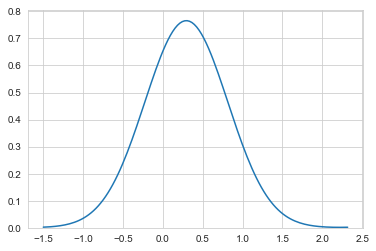

In [130]:
sns.set_style('whitegrid')
sns.kdeplot(jaccards, bw=0.5)

In [148]:
cossim(food_vector, models[3]['vlees', 'vleeswaren'])

ValueError: shapes (3,300) and (2,300) not aligned: 300 (dim 1) != 2 (dim 0)

In [290]:
foods = models[3].most_similar([food_vector], topn=100)

In [291]:
foods_ = [x[0] for x in foods]


In [292]:
food_vector = np.mean(models[3]['aardappel', 'broccoli','bloemkool', 'kip', 'worst', 'ham'], axis=0)
meat_vector = np.mean(models[3]['vlees', 'vleeswaren'], axis=0)
vegetable_vector = np.mean(models[3]['groente', 'groentes'], axis=0)

In [293]:
meat_distance = []
vegetable_distance = []
for food in foods_:
    meat_distance.append(cossim(models[3][food], meat_vector))
    vegetable_distance.append(cossim(models[3][food], vegetable_vector))

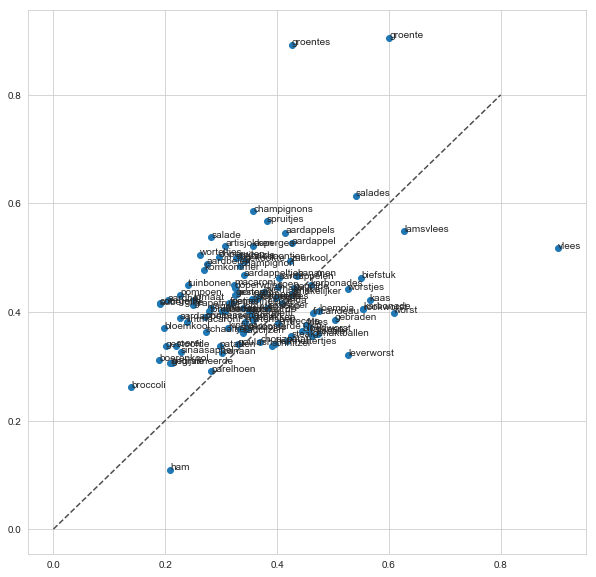

In [295]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(meat_distance, vegetable_distance)
for i, txt in enumerate(foods_):
    ax.annotate(txt, (meat_distance[i], vegetable_distance[i]))
ax.plot([0, .8], [0, .8], ls="--", c=".3")

In [296]:
meat_vegetable_vector = models[3]['vlees'] - models[3]["groente"]
meat_vegetable_distance = []
for food in foods_:
    meat_vegetable_distance.append(cossim(models[3][food], meat_vegetable_vector))
    
sweet_salty_vector = np.mean(models[3]['suiker','zoet', 'zoetig'],axis=0) - np.mean(models[3]['zout', 'zoutig'], axis=0)

sweet_salty_distance = []
for food in foods_:
    sweet_salty_distance.append(cossim(models[3][food], sweet_salty_vector))

Text(0,0.5,'sweet - salty')

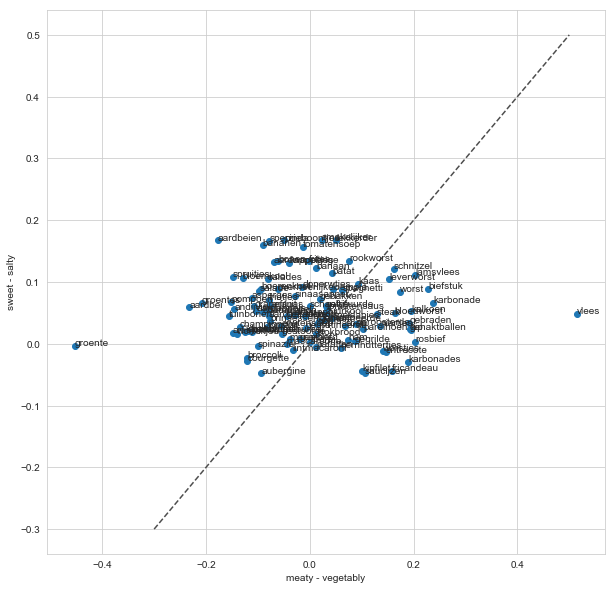

In [297]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(meat_vegetable_distance, sweet_salty_distance)
for i, txt in enumerate(foods_):
    ax.annotate(txt, (meat_vegetable_distance[i], sweet_salty_distance[i]))
ax.plot([-.3, .5], [-.3, .5], ls="--", c=".3")
plt.xlabel("meaty - vegetably")
plt.ylabel("sweet - salty")

In [299]:
models[3].most_similar('bank', topn=25)

[('bankinstelling', 0.6842188239097595),
 ('banken', 0.6608539819717407),
 ('handelsbank', 0.6530541777610779),
 ('handelsbanken', 0.620225727558136),
 ('hypotheekbank', 0.6180963516235352),
 ('bankiershuis', 0.6075431108474731),
 ('staatsbank', 0.6010351181030273),
 ('huisbankier', 0.5927467346191406),
 ('credit', 0.5888980627059937),
 ('investeringsbank', 0.577370285987854),
 ('bankconcern', 0.5696618556976318),
 ('effectenbank', 0.5543259382247925),
 ('financieringsmaatschappij', 0.5527708530426025),
 ('bankier', 0.5415019989013672),
 ('bankinstellingen', 0.5392013192176819),
 ('spaarbanken', 0.5383011698722839),
 ('verzekeringsconcern', 0.5247326493263245),
 ('effectenkantoor', 0.5133160352706909),
 ('bijkantoor', 0.5129662752151489),
 ('verzekeringsmaatschappij', 0.5124457478523254),
 ('moedermaatschappij', 0.5113348960876465),
 ('bankconsortium', 0.5099227428436279),
 ('kredietverlening', 0.5095367431640625),
 ('bankiersvereniging', 0.5076541900634766),
 ('bankwereld', 0.50545835

In [112]:
distances = []
years = [1960, 1970, 1980]
key = 'oorlog'
for i in range(0, len(models)-1):
    distances.append(calc_distance_between_vectors(models[(i-1)+1][key], models[i + 1][key]))

In [121]:
calc_distance_between_vectors(models[1]['wapens'], models[2]['wapens'])

0.0

In [142]:
christianity = ['doop',
                'messias', 
                'katholicisme', 
                'christendom', 
                'verlossing',
                'protestant', 
                'jezus', 
                'christus', 
                'kerk']

In [126]:
def cossim(v1, v2, signed = True):
    c = np.dot(v1, v2)/np.linalg.norm(v1)/np.linalg.norm(v2)
    if not signed:
        return abs(c)
    return c

In [112]:
cossim(model['communisme'], model2['communisme'])

0.87318164

In [114]:
print(model[christianity].var())
print(model2[christianity].var())
print(model3[christianity].var())

0.0033330359
0.0033317986
0.003333173


In [62]:
model.most_similar("communisme", topn=5)

[('kapitalisme', 0.7413933277130127),
 ('imperialisme', 0.7057558298110962),
 ('kapitalistische', 0.6974900960922241),
 ('regiem', 0.6896220445632935),
 ('ideologie', 0.6830700039863586)]

In [62]:
yTerms = SortedDict()
yLinks = SortedDict()

In [62]:
sortedKeys = model2.vocab.keys()

In [65]:
model['communisme']

array([-0.05953864, -0.06608585,  0.05655144, -0.15380959, -0.00718343,
       -0.0160841 , -0.13614807,  0.0198624 ,  0.09744193,  0.06287014,
       -0.07119982, -0.12562901, -0.09788055, -0.10099917,  0.16604246,
       -0.02073995, -0.11430966, -0.02256863, -0.13228981,  0.10485657,
       -0.11151238,  0.11461014,  0.02720036,  0.20482713,  0.01529762,
        0.03935155, -0.03174562, -0.10255636, -0.00241621,  0.25700456,
       -0.17520136,  0.02103506,  0.02599602,  0.01553081, -0.1298051 ,
       -0.26184455, -0.01808393,  0.03011501, -0.06735516,  0.01300642,
       -0.1434552 , -0.13888551,  0.1333619 ,  0.06436138,  0.1903968 ,
        0.00708404, -0.09336974,  0.23342137,  0.0035793 , -0.01637718,
        0.13774383, -0.05461056,  0.05938341, -0.09673276,  0.11449451,
        0.28269362,  0.11001812,  0.05774627, -0.05242467,  0.1628339 ,
       -0.10634366, -0.08469763,  0.02990113,  0.20497942, -0.03560136,
       -0.14783438, -0.04981564, -0.07026649, -0.07450823,  0.03

In [61]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [62]:
keys = ['politiek', 'crimineel', 'communisme']

In [63]:
embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=100):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

2019-02-11 18:35:45,285 : INFO : precomputing L2-norms of word weight vectors


In [64]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)


In [65]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()




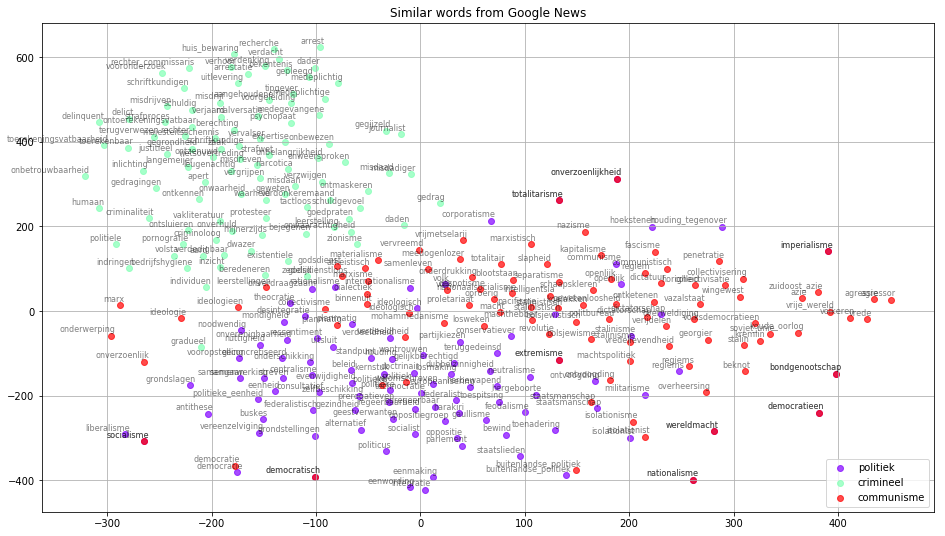

In [66]:
tsne_plot_similar_words('Similar words from Google News', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

In [3]:
def sampleVectors(vectors, size_frac):
    size = len(vectors)
    log(f'Sampling {size_frac * 100}% of {size} vectors')
    sample = int(size * size_frac)
    numFeat = len(vectors[0])
    sampVecs = np.ndarray((sample, numFeat), np.float32)
    indices = np.random.choice(len(vectors), sample)
    for i, val in enumerate(indices):
        sampVecs[i] = vectors[val]
    return sampVecs, indices

In [11]:
def reduceWithPCA(vectors, size):
    log(f'Reducing data to {size} features using PCA (fast)')
    pca = PCA(n_components=size)
    vecs = pca.fit_transform(vectors)

    return vecs

def reduceWithUMAP(vectors, size):
    log(f'Reducing data to {size} features using UMAP (slow-ish)')
    umap = UMAP(n_neighbors=15, min_dist=0.1, metric='euclidean', n_components=size)
    vecs = umap.fit_transform(vectors)

    return vecs

def reduceWithTSNE(vectors, size):
    log(f'Reducing data to {size} features using T-SNE (slow)')
    tsne = TSNE(n_components=size)
    vecs = tsne.fit_transform(vectors)

    return vecs

def PCA_then_UMAP(vectors, pca_size, umap_size):
    pcaVecs = reduceWithPCA(vectors, pca_size)
    umapVecs = reduceWithUMAP(pcaVecs, umap_size)

    return umapVecs


def PCA_then_TSNE(vectors, pca_size, tsne_size):
    pcaVecs = reduceWithPCA(vectors, pca_size)
    tsneVecs = reduceWithTSNE(pcaVecs, tsne_size)

    return tsneVecs

def clusterForColour(vectors, size):
    log(f'Using KMeans to generate {size} groups so the final graph is prettier...')
    clusters = KMeans(n_clusters=size).fit_predict(vectors)

    return clusters

# save in a format our graphit.html file is expecting (basically a json object)
def saveAsGraphitFile(model, vectors, indices, clusters, fname):
    log(f'Writing data to {fname}...')
    f = open(fname, "w", encoding='utf-8')
    f.write('var W2VDATA=[\n')
    for i, val in enumerate(indices):
        kw = model.index2word[val]
        if len(kw) > 1:
            v = vectors[i]
            f.write('["')
            f.write(kw.replace('"', '\\"'))  # keyword
            f.write('",')
            f.write(str(v[0]))  # x
            f.write(',')
            f.write(str(v[1]))  # y
            f.write(',')
            f.write(str(v[2]))  # z
            f.write(',')
            f.write(str(clusters[i]))  # colour group (just an integer)
            f.write('],\n')
    f.write('];\n')
    f.close()

    return fname

def plot2D(vectors):
    x = np.flipud(np.rot90(vectors[:], k=1, axes=(0, 1)))
    plt.scatter(x[0], x[1], c=clusters, marker=".")
    plt.show()
    plt.pause(5)
    
def log(msg):
    print(datetime.datetime.time(datetime.datetime.now()), msg)

In [175]:
model = models[15]

In [234]:
noun_model = np.ndarray((len(nouns[0]), 300), np.float32)

In [240]:
keys = [str(noun) for noun in nouns[0]]

In [241]:
for i, noun in enumerate(keys):
    noun_model[i] = model[noun]

In [246]:
vectors = noun_model.vectors

AttributeError: 'numpy.ndarray' object has no attribute 'vectors'

In [247]:
vectors = PCA_then_UMAP(vectors, 50, 3)


13:01:34.720631 Reducing data to 50 features using PCA (fast)
13:01:35.661367 Reducing data to 3 features using UMAP (slow-ish)


In [248]:
clusters = clusterForColour(vectors, 10)

13:03:05.507725 Using KMeans to generate 10 groups so the final graph is prettier...


In [249]:
fname = saveAsGraphitFile(model, vectors, indices, clusters, './html/keyword-data.js')

log(f'Finished, now open html/graphit.html')

13:03:07.987667 Writing data to ./html/keyword-data.js...
13:03:08.405507 Finished, now open html/graphit.html


In [183]:
model.vocab

{'wel': <gensim.models.keyedvectors.Vocab at 0x198d1eac8>,
 'jaar': <gensim.models.keyedvectors.Vocab at 0x198d1ea58>,
 'twee': <gensim.models.keyedvectors.Vocab at 0x198d1eb38>,
 'amsterdam': <gensim.models.keyedvectors.Vocab at 0x198d1eb70>,
 'weer': <gensim.models.keyedvectors.Vocab at 0x198d1ebe0>,
 'uur': <gensim.models.keyedvectors.Vocab at 0x198d1ec50>,
 'nederland': <gensim.models.keyedvectors.Vocab at 0x198d1ec88>,
 'grote': <gensim.models.keyedvectors.Vocab at 0x198d1ecf8>,
 'moeten': <gensim.models.keyedvectors.Vocab at 0x198d1ed68>,
 'eerste': <gensim.models.keyedvectors.Vocab at 0x198d1edd8>,
 'nederlandse': <gensim.models.keyedvectors.Vocab at 0x198d1ee10>,
 'alle': <gensim.models.keyedvectors.Vocab at 0x198d1ee80>,
 'waar': <gensim.models.keyedvectors.Vocab at 0x198d1eef0>,
 'alleen': <gensim.models.keyedvectors.Vocab at 0x198d1ef60>,
 'zullen': <gensim.models.keyedvectors.Vocab at 0x198d1efd0>,
 'heer': <gensim.models.keyedvectors.Vocab at 0x198d1f080>,
 'komen': <gensi

In [192]:
keys = []
for k in model.vocab:
    keys.append(k)

In [193]:
keys

['wel',
 'jaar',
 'twee',
 'amsterdam',
 'weer',
 'uur',
 'nederland',
 'grote',
 'moeten',
 'eerste',
 'nederlandse',
 'alle',
 'waar',
 'alleen',
 'zullen',
 'heer',
 'komen',
 'drie',
 'man',
 'gaan',
 'gulden',
 'onze_correspondent',
 'zei',
 'gaat',
 'wij',
 'tussen',
 'goed',
 'percent',
 'mensen',
 'maken',
 'den_haag',
 'volgens',
 'tijd',
 'kwam',
 'staat',
 'echter',
 'werden',
 'toe',
 'onze',
 'werk',
 'laatste',
 'jan',
 'zeer',
 'rotterdam',
 'nieuws',
 'eigen',
 'mei',
 'steeds',
 'vooral',
 'zoals',
 'weg',
 'vier',
 'aantal',
 'land',
 'waarin',
 'regering',
 'hadden',
 'laten',
 'zien',
 'politie',
 'mee',
 'willen',
 'zelfs',
 'jarige',
 'plaats',
 'per',
 'leven',
 'tweede',
 'juli',
 'utrecht',
 'vrouw',
 'zouden',
 'ver',
 'dag',
 'maart',
 'vijf',
 'heel',
 'moest',
 'oude',
 'staan',
 'ging',
 'auto',
 'minder',
 'geven',
 'tijdens',
 'krijgen',
 'weinig',
 'miljoen_gulden',
 'deel',
 'zeggen',
 'groot',
 'week',
 'meter',
 'achter',
 'bijna',
 'programma',
 'bi

In [186]:
nlp = spacy.load('nl_core_news_sm', disable=['parser', 'ner'])

In [198]:
allowed_postags=['NOUN', 'PROPN']
nouns = []
for key in keys[:100]:
    
    key_ = nlp(" " key)
    nouns.append([k for k in key_ if key.pos_ in allowed_postags ])

AttributeError: 'str' object has no attribute 'pos_'

In [206]:
keys_ = nlp(' '.join(key for key in keys))

In [228]:
nouns = []
nouns.append([token for token in keys_ if token.pos_ in allowed_postags])

In [230]:
len(nouns[0])

28827